**Install Packages**

In [ ]:
!pip install -q torch transformers diffusers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade --force-reinstall torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6

In [ ]:
#!pip uninstall -y torchvision torch-xla
#!pip install torch diffusers torch-xla

In [8]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 10.6 MB/s eta 0:00:00


In [ ]:
!apt-get update && apt-get install -y sqlite3 libsqlite3-dev

**Import Packages**

In [9]:
import torch
from diffusers import StableDiffusionXLPipeline,DiffusionPipeline
from PIL import Image
import json
from datetime import datetime
import time
import os
import groq
import sqlite3
from sqlite3 import connect
import gradio as gr
import re
try:
    from IPython.display import display as ipython_display
except ImportError:
    ipython_display = print

Defining the PromptAnalyzer class

The PromptAnalyzer class extracts cultural elements, subjects, styles, colors, and other key details from a text prompt to understand its context and setting. It is especially designed to recognize African cultural references and guide more accurate AI image generation.

In [7]:
class PromptAnalyzer:
    def __init__(self):
        # Cultural keywords for specific cultural context detection
        self.cultural_keywords = {
            # West African cultural elements
            'yoruba': {'ethnic_group': 'yoruba', 'region': 'west_africa'},
            'igbo': {'ethnic_group': 'igbo', 'region': 'west_africa'},
            'hausa': {'ethnic_group': 'hausa', 'region': 'west_africa'},
            'akan': {'ethnic_group': 'akan', 'region': 'west_africa'},
            'ashanti': {'ethnic_group': 'ashanti', 'region': 'west_africa'},

            # East African
            'maasai': {'ethnic_group': 'maasai', 'region': 'east_africa'},
            'swahili': {'ethnic_group': 'swahili', 'region': 'east_africa'},

            # North African
            'berber': {'ethnic_group': 'berber', 'region': 'north_africa'},
            'tuareg': {'ethnic_group': 'tuareg', 'region': 'north_africa'},

            # Traditional clothing
            'agbada': {'clothing': 'formal', 'type': 'agbada', 'region': 'west_africa'},
            'dashiki': {'clothing': 'casual', 'type': 'dashiki', 'region': 'west_africa'},
            'gele': {'clothing': 'headgear', 'type': 'gele', 'region': 'west_africa'},
            'ankara': {'clothing': 'fabric', 'type': 'ankara', 'region': 'west_africa'},
            'kente': {'clothing': 'fabric', 'type': 'kente', 'region': 'west_africa'},
            'boubou': {'clothing': 'formal', 'type': 'boubou', 'region': 'west_africa'},
            'shuka': {'clothing': 'fabric', 'type': 'shuka', 'region': 'east_africa'},
            'kanzu': {'clothing': 'formal', 'type': 'kanzu', 'region': 'east_africa'},
            'djellaba': {'clothing': 'formal', 'type': 'djellaba', 'region': 'north_africa'},

            # Settings
            'market': {'setting': 'urban', 'type': 'market'},
            'village': {'setting': 'rural', 'type': 'village'},
            'savanna': {'setting': 'grassy', 'region': 'inland', 'type': 'savanna'},
            'desert': {'setting': 'arid', 'region': 'north', 'type': 'desert'},
            'forest': {'setting': 'dense', 'region': 'central', 'type': 'forest'},
            'beach': {'setting': 'coastal', 'region': 'coastal', 'type': 'beach'},
            'mountain': {'setting': 'highlands', 'region': 'highland', 'type': 'mountain'},
            'jungle': {'setting': 'tropical', 'region': 'equatorial', 'type': 'jungle'}
        }

        # General categories for broad topic detection
        self.general_categories = {
            'portrait': ['portrait', 'headshot', 'face', 'selfie'],
            'landscape': ['landscape', 'scenery', 'vista', 'panorama', 'nature'],
            'urban': ['city', 'street', 'urban', 'building', 'architecture'],
            'wildlife': ['animal', 'wildlife', 'lion', 'elephant', 'giraffe', 'zebra'],
            'abstract': ['abstract', 'conceptual', 'surreal', 'fantasy'],
            'action': ['dancing', 'running', 'jumping', 'movement', 'action'],
            'celebration': ['festival', 'celebration', 'ceremony', 'wedding', 'dance'],
            'historical': ['historical', 'ancient', 'traditional', 'vintage', 'retro']
        }

        # Color patterns for detection
        self.color_patterns = [
            'red', 'blue', 'green', 'yellow', 'orange', 'purple',
            'black', 'white', 'brown', 'gold', 'silver', 'colorful',
            'vibrant', 'bright', 'dark', 'pastel', 'neon'
        ]

        # Style patterns
        self.style_patterns = [
            'realistic', 'photorealistic', 'stylized', 'cartoon', 'anime',
            'watercolor', 'oil painting', 'sketch', 'digital art', 'cinematic',
            'documentary', 'futuristic', 'minimalist', 'maximalist', 'surrealist'
        ]

    def analyze(self, prompt):
        # Initialize context dictionary
        context = {
            'cultural_elements': {},
            'general_category': None,
            'colors': [],
            'styles': [],
            'subjects': [],
            'time_of_day': None,
            'prompt_length': len(prompt.split()),
            'is_cultural': False
        }

        # Clean and prepare the prompt
        prompt_lower = prompt.lower()
        words = re.findall(r'\b\w+\b', prompt_lower)

        # Extract cultural elements
        for keyword, attributes in self.cultural_keywords.items():
            if keyword in prompt_lower:
                context['is_cultural'] = True
                for key, value in attributes.items():
                    if key not in context['cultural_elements']:
                        context['cultural_elements'][key] = []
                    if value not in context['cultural_elements'][key]:
                        context['cultural_elements'][key].append(value)

        # Extract general category
        for category, keywords in self.general_categories.items():
            for keyword in keywords:
                if keyword in prompt_lower:
                    context['general_category'] = category
                    break
            if context['general_category']:
                break

        # If no category is detected, use heuristics
        if not context['general_category']:
            # Default to portrait if it seems like a person description
            person_indicators = ['man', 'woman', 'person', 'child', 'boy', 'girl']
            for indicator in person_indicators:
                if indicator in words:
                    context['general_category'] = 'portrait'
                    context['subjects'].append(indicator)
                    break

            # Still no category, default to landscape
            if not context['general_category']:
                context['general_category'] = 'landscape'

        # Extract subjects (simplified)
        subjects = {
            'man': 'adult male', 'woman': 'adult female', 'person': 'human',
            'child': 'young person', 'boy': 'male child', 'girl': 'female child',
            'elder': 'elderly person', 'family': 'group of related people'
        }

        for subject, description in subjects.items():
            if subject in prompt_lower and subject not in context['subjects']:
                context['subjects'].append(subject)

        # Extract colors
        for color in self.color_patterns:
            if color in prompt_lower and color not in context['colors']:
                context['colors'].append(color)

        # Extract styles
        for style in self.style_patterns:
            if style in prompt_lower and style not in context['styles']:
                context['styles'].append(style)

        # Extract time of day
        time_indicators = {
            'morning': ['morning', 'dawn', 'sunrise', 'early'],
            'noon': ['noon', 'midday', 'daylight', 'sunny'],
            'evening': ['evening', 'sunset', 'dusk', 'twilight'],
            'night': ['night', 'midnight', 'dark', 'starry']
        }

        for time, indicators in time_indicators.items():
            for indicator in indicators:
                if indicator in prompt_lower:
                    context['time_of_day'] = time
                    break
            if context['time_of_day']:
                break

        return context

**Defining the GroqPromptEnhancer**

The GroqPromptEnhancer class enriches user prompts using  Llama model from groq API, adding vivid artistic details while preserving the original meaning. It selects style templates based on the prompt's context and generates enhanced prompts for better image generation results.

In [6]:
class GroqPromptEnhancer:
    def __init__(self, api_key=None):
        # Initialize Groq client with API key
        if api_key is None:
            # Try to get API key from environment variable
            api_key = os.environ.get("GROQ_API_KEY")
            if api_key is None:
                raise ValueError("No Groq API key provided. Set GROQ_API_KEY environment variable or pass api_key parameter.")

        self.client = groq.Client(api_key=api_key)

        # Style templates for various scenarios
        self.style_templates = {
            # Cultural styles
            "west_african": (
                "A {subject} {action_phrase}, showcasing {west_african_elements}, "
                "with vibrant colors and detailed textures, natural lighting highlighting "
                "authentic cultural elements"
            ),
            "east_african": (
                "A {subject} {action_phrase}, depicting {east_african_elements}, "
                "with rich colors and detailed environment, natural lighting accentuating "
                "the cultural authenticity"
            ),

            # General styles by category
            "portrait": (
                "A detailed portrait of {subject}, {descriptor}, with {lighting} lighting, "
                "{mood} atmosphere, highly detailed facial features"
            ),
            "landscape": (
                "{descriptor} landscape scene with {elements}, {lighting} illuminating the scene, "
                "atmospheric perspective, detailed textures"
            ),
            "urban": (
                "An urban scene featuring {subject}, {descriptor}, with {lighting} light, "
                "detailed architectural elements, atmospheric perspective"
            ),
            "abstract": (
                "An abstract {mood} composition with {elements}, {color_scheme} color palette, "
                "dynamic composition, {texture} textures"
            ),
            "action": (
                "Dynamic scene of {subject} {action_phrase}, captured with {technique}, "
                "{lighting} lighting emphasizing movement, {mood} energy"
            ),

            # Fallback general style
            "general": (
                "{subject} {action_phrase}, {descriptor}, {lighting} lighting, "
                "detailed textures, professional quality, 8k resolution"
            )
        }

    def _get_appropriate_style_template(self, context):
        """Select the most appropriate style template based on the analyzed context"""

        # Check for cultural context first
        if context['is_cultural']:
            cultural_regions = context['cultural_elements'].get('region', [])
            if 'west_africa' in cultural_regions:
                return "west_african"
            elif 'east_africa' in cultural_regions:
                return "east_african"

        # If no cultural context or not specific enough, use general category
        if context['general_category']:
            if context['general_category'] in self.style_templates:
                return context['general_category']

        # Fallback to general template
        return "general"

    def enhance(self, prompt, context):
        """Enhance the prompt using Groq's Llama model"""

        # Select appropriate base template
        template_key = self._get_appropriate_style_template(context)

        # Prepare a system prompt that guides Llama on prompt enhancement
        llama_system_prompt = """
        You are an expert AI prompt engineer specializing in enhancing prompts for image generation AI systems.
        Your task is to enhance the given user prompt to create a detailed, vivid, and visually appealing image.

        Guidelines:
        1. Maintain the original intent and subject matter of the prompt
        2. Add descriptive details that improve visual clarity
        3. Incorporate artistic elements like lighting, composition, and atmosphere
        4. Add technical specifications that improve image quality (like "detailed", "high resolution", "8K", hyper-realistic)
        5. Keep the enhanced prompt concise (under 75 words) but detailed
        6. Respect any cultural context by maintaining accuracy and authenticity
        7. Do not change the fundamental subject or scene described by the user

        Return ONLY the enhanced prompt with no explanations, preambles, or text formatting.
        """

        # Construct a rich context message for Llama
        context_summary = {}

        # Add subject information
        subjects = context.get('subjects', [])
        subject_text = "a person" if not subjects else ", ".join(subjects)
        context_summary['subject'] = subject_text

        # Add style information
        styles = context.get('styles', [])
        style_text = "no specific style" if not styles else ", ".join(styles)
        context_summary['style'] = style_text

        # Add cultural elements if present
        if context['is_cultural']:
            cultural_elements = []
            for key, values in context['cultural_elements'].items():
                if values:
                    cultural_elements.append(f"{key}: {', '.join(values)}")
            context_summary['cultural_elements'] = cultural_elements

        # Construct user message
        llama_user_prompt = f"""
        Original prompt: "{prompt}"

        Context analysis: {json.dumps(context_summary, indent=2)}

        Enhance this prompt to create a detailed, visually striking image while preserving the original intent.
        The enhanced prompt should be clear, descriptive, and optimized for an image generation AI.
        """

        # Call Groq API with Llama model
        try:
            response = self.client.chat.completions.create(
                model="llama3-8b-8192",  # Use Llama model from Groq
                messages=[
                    {"role": "system", "content": llama_system_prompt},
                    {"role": "user", "content": llama_user_prompt}
                ],
                temperature=0.7,
                max_tokens=150
            )

            # Extract the enhanced prompt from the response
            enhanced_prompt = response.choices[0].message.content.strip()

            # Clean the response - remove quotes if present
            if enhanced_prompt.startswith('"') and enhanced_prompt.endswith('"'):
                enhanced_prompt = enhanced_prompt[1:-1]

            return enhanced_prompt

        except Exception as e:
            print(f"Error calling Groq API: {e}")
            # Fallback: return original prompt with minimal enhancement
            fallback_enhancement = f"{prompt}, detailed, high quality, 8K"
            print(f"Using fallback enhancement: {fallback_enhancement}")
            return fallback_enhancement


**Defining StableDiffusionGenerator**

The StableDiffusionGenerator class generates high-quality, culturally appropriate images from text prompts using a Stable Diffusion model optimized for GPU. It handles both positive and negative prompts, applies memory-efficient techniques, and customizes outputs based on context like culture or style.

In [5]:
class StableDiffusionGenerator:
    def __init__(self, model_id="CompVis/stable-diffusion-v1-4"):
        print(f"Loading {model_id}... (This may take a few minutes)")
        start_time = time.time()
        torch.cuda.empty_cache()

        self.pipeline = DiffusionPipeline.from_pretrained(
            model_id,
            torch_dtype=torch.bfloat16,
            #variant="fp16",
            use_safetensors=True
        ).to("cuda")

        # Enable memory efficient attention if available
        try:
            self.pipeline.enable_attention_slicing()
        except:
            print("XFormers not available, using default attention")

        print(f"Model loaded in {time.time() - start_time:.1f} seconds")

    def generate_image(self, prompt, context, negative_prompt=None, width=512, height=512):
        """Generate an image using the enhanced prompt and context"""

        # Build default negative prompt if none provided
        if negative_prompt is None:
            negative_prompt = "deformed, blurry, low quality, bad anatomy, disfigured, poorly drawn face, mutation, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs"

            # Add context-specific negative prompts
            if context['is_cultural']:
                if 'west_africa' in context['cultural_elements'].get('region', []):
                    negative_prompt += ", whitewashed, westernized, european features"
                elif 'east_africa' in context['cultural_elements'].get('region', []):
                    negative_prompt += ", westernized, inaccurate cultural elements"

            if context['general_category'] == 'portrait':
                negative_prompt += ", distorted face, multiple faces"

        print("\nGenerating image...")
        start_time = time.time()

        # Generate the image
        result = self.pipeline(
            prompt,
            negative_prompt=negative_prompt,
            width=width,
            height=height,
            guidance_scale=7.5,
            num_inference_steps=30
        )

        image = result.images[0]
        print(f"Image generated in {time.time() - start_time:.1f} seconds")

        return image

**Defining MockDatabse with Sqlite**



The MockDatabase class provides a lightweight SQLite database to store, retrieve, and search image generation metadata and cultural elements. It manages generation records, supports searches by cultural attributes, and ensures easy saving and retrieval of generation history.

In [11]:
class MockDatabase:
    """
    A simple SQLite database implementation to store generation metadata and image references
    """
    def __init__(self, db_path="image_generator.db"):
        """Initialize database connection and create tables if they don't exist"""
        self.db_path = db_path
        self.conn = sqlite3.connect(db_path)
        self.cursor = self.conn.cursor()
        self._create_tables()
        print(f"Database initialized at {db_path}")

    def _create_tables(self):
        """Create the necessary tables if they don't exist"""
        # Create a table for generation records
        self.cursor.execute('''
        CREATE TABLE IF NOT EXISTS generations (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            timestamp TEXT NOT NULL,
            original_prompt TEXT NOT NULL,
            enhanced_prompt TEXT NOT NULL,
            image_path TEXT NOT NULL,
            metadata_path TEXT NOT NULL,
            width INTEGER NOT NULL,
            height INTEGER NOT NULL,
            created_at TEXT NOT NULL
        )
        ''')

        # Create a table for cultural elements detected
        self.cursor.execute('''
        CREATE TABLE IF NOT EXISTS cultural_elements (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            generation_id INTEGER NOT NULL,
            element_type TEXT NOT NULL,
            element_value TEXT NOT NULL,
            FOREIGN KEY (generation_id) REFERENCES generations (id)
        )
        ''')

        self.conn.commit()
        print("Database tables created or already exist")

    def save_generation(self, timestamp, original_prompt, enhanced_prompt,
                       image_path, metadata_path, context, width, height):
        """
        Save a generation record and its associated cultural elements

        Returns: The ID of the newly created generation record
        """
        now = datetime.now().isoformat()

        # Insert the main generation record
        self.cursor.execute('''
        INSERT INTO generations
        (timestamp, original_prompt, enhanced_prompt, image_path, metadata_path, width, height, created_at)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (timestamp, original_prompt, enhanced_prompt, image_path, metadata_path, width, height, now))

        # Get the ID of the newly inserted generation
        generation_id = self.cursor.lastrowid

        # Insert cultural elements if present
        if context.get('is_cultural') and context.get('cultural_elements'):
            for element_type, values in context['cultural_elements'].items():
                if values:
                    for value in values:
                        self.cursor.execute('''
                        INSERT INTO cultural_elements (generation_id, element_type, element_value)
                        VALUES (?, ?, ?)
                        ''', (generation_id, element_type, value))

        # Save subjects if any
        if context.get('subjects'):
            for subject in context['subjects']:
                self.cursor.execute('''
                INSERT INTO cultural_elements (generation_id, element_type, element_value)
                VALUES (?, ?, ?)
                ''', (generation_id, 'subject', subject))

        # Save styles if any
        if context.get('styles'):
            for style in context['styles']:
                self.cursor.execute('''
                INSERT INTO cultural_elements (generation_id, element_type, element_value)
                VALUES (?, ?, ?)
                ''', (generation_id, 'style', style))

        # Commit the transaction
        self.conn.commit()
        print(f"Generation saved to database with ID: {generation_id}")

        return generation_id

    def get_generation(self, generation_id):
        """Retrieve a specific generation by ID"""
        self.cursor.execute('''
        SELECT * FROM generations WHERE id = ?
        ''', (generation_id,))

        generation = self.cursor.fetchone()
        if not generation:
            return None

        # Convert to dictionary
        gen_dict = {
            'id': generation[0],
            'timestamp': generation[1],
            'original_prompt': generation[2],
            'enhanced_prompt': generation[3],
            'image_path': generation[4],
            'metadata_path': generation[5],
            'width': generation[6],
            'height': generation[7],
            'created_at': generation[8],
            'cultural_elements': []
        }

        # Get associated cultural elements
        self.cursor.execute('''
        SELECT element_type, element_value FROM cultural_elements
        WHERE generation_id = ?
        ''', (generation_id,))

        elements = self.cursor.fetchall()
        for element in elements:
            gen_dict['cultural_elements'].append({
                'type': element[0],
                'value': element[1]
            })

        return gen_dict

    def get_recent_generations(self, limit=10):
        """Get the most recent generations"""
        self.cursor.execute('''
        SELECT id, timestamp, original_prompt, enhanced_prompt
        FROM generations
        ORDER BY id DESC
        LIMIT ?
        ''', (limit,))

        generations = self.cursor.fetchall()
        return [{'id': g[0], 'timestamp': g[1], 'original_prompt': g[2], 'enhanced_prompt': g[3]}
                for g in generations]

    def search_by_cultural_element(self, element_type, element_value):
        """Search generations by cultural element"""
        self.cursor.execute('''
        SELECT g.id, g.timestamp, g.original_prompt, g.enhanced_prompt
        FROM generations g
        JOIN cultural_elements c ON g.id = c.generation_id
        WHERE c.element_type = ? AND c.element_value = ?
        ORDER BY g.id DESC
        ''', (element_type, element_value))

        generations = self.cursor.fetchall()
        return [{'id': g[0], 'timestamp': g[1], 'original_prompt': g[2], 'enhanced_prompt': g[3]}
                for g in generations]

    def close(self):
        """Close the database connection"""
        if self.conn:
            self.conn.close()
            print("Database connection closed")


**Setting up Logging**

The setup_logging function configures logging to both a file and the console, creating a logs directory if needed. It initializes a logger named "CulturalImageGenerator" for tracking events and debugging.

In [12]:
import logging
def setup_logging(log_file="image_generator.log", level=logging.INFO):
    """Set up logging configuration"""
    # Create logs directory if it doesn't exist
    log_dir = os.path.dirname(log_file)
    if log_dir and not os.path.exists(log_dir):
        os.makedirs(log_dir)

    # Configure logging
    logging.basicConfig(
        level=level,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_file),
            logging.StreamHandler()  # Also output to console
        ]
    )

    # Create a logger instance
    logger = logging.getLogger("CulturalImageGenerator")
    logger.info("Logging system initialized")

    return logger

**Defining function for enerating Images with the enhanced Prompt**

In [13]:
def generate_enhanced_image(prompt, groq_api_key=None, output_dir="output",
                           width=512, height=512, save_metadata=True):
    """
    Main function to generate images with enhanced prompts

    Parameters:
    - prompt: Original user prompt
    - groq_api_key: API key for Groq (can be None if set in env vars)
    - output_dir: Directory to save outputs
    - width: Image width
    - height: Image height
    - save_metadata: Whether to save metadata along with image

    Returns:
    - tuple: (PIL.Image, enhanced_prompt, context)
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Step 1: Analyze the prompt
    print("\nAnalyzing prompt...")
    analyzer = PromptAnalyzer()
    context = analyzer.analyze(prompt)
    print(f"Analysis complete: {context['general_category']} " +
          (f"with cultural elements" if context['is_cultural'] else "without specific cultural elements"))

    # Step 2: Enhance the prompt
    print("\nEnhancing prompt using Groq's Llama model...")
    enhancer = GroqPromptEnhancer(api_key=groq_api_key)
    enhanced_prompt = enhancer.enhance(prompt, context)
    print(f"Enhanced Prompt: {enhanced_prompt}")

    # Step 3: Generate the image
    generator = StableDiffusionGenerator()
    image = generator.generate_image(enhanced_prompt, context, width=width, height=height)

    # Step 4: Save outputs
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    image_path = os.path.join(output_dir, f"{timestamp}.png")
    image.save(image_path)
    print(f"\nImage saved to: {image_path}")

    # Save metadata if requested
    if save_metadata:
        metadata = {
            "original_prompt": prompt,
            "enhanced_prompt": enhanced_prompt,
            "context": context,
            "timestamp": timestamp,
            "image_size": {"width": width, "height": height}
        }

        # Convert sets to lists for JSON serialization
        metadata_path = os.path.join(output_dir, f"{timestamp}_metadata.json")
        with open(metadata_path, "w") as f:
            json.dump(metadata, f, indent=2, default=lambda o: list(o) if isinstance(o, set) else o)

        print(f"Metadata saved to: {metadata_path}")

    # Display image if in a notebook environment
    try:
        ipython_display(image)
    except:
        pass

    return image, enhanced_prompt, context

**Defining function for generating Image with the mock db**

In [14]:
def generate_enhanced_image_with_db(prompt, groq_api_key=None, output_dir="output",
                                  width=512, height=512, db=None, logger=None):
    """
    Main function to generate images with enhanced prompts, with database and logging

    Parameters:
    - prompt: Original user prompt
    - groq_api_key: API key for Groq (can be None if set in env vars)
    - output_dir: Directory to save outputs
    - width: Image width
    - height: Image height
    - db: Database instance (optional)
    - logger: Logger instance (optional)

    Returns:
    - tuple: (PIL.Image, enhanced_prompt, context, generation_id)
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Use default logger if none provided
    if logger is None:
        logger = logging.getLogger("CulturalImageGenerator")

    # Connect to database if not provided
    if db is None:
        db = MockDatabase()

    # Log the request
    logger.info(f"Processing prompt: '{prompt}' ({width}x{height})")

    try:
        # Step 1: Analyze the prompt
        logger.debug("Analyzing prompt...")
        analyzer = PromptAnalyzer()
        context = analyzer.analyze(prompt)
        logger.info(f"Analysis complete: {context['general_category']} " +
                  ("with cultural elements" if context['is_cultural'] else "without specific cultural elements"))

        # Step 2: Enhance the prompt
        logger.debug("Enhancing prompt using Groq's Llama model...")
        enhancer = GroqPromptEnhancer(api_key=groq_api_key)
        enhanced_prompt = enhancer.enhance(prompt, context)
        logger.info(f"Enhanced Prompt: {enhanced_prompt}")

        # Step 3: Generate the image
        logger.debug("Generating image with Stable Diffusion...")
        generator = StableDiffusionGenerator()
        start_time = time.time()
        image = generator.generate_image(enhanced_prompt, context, width=width, height=height)
        generation_time = time.time() - start_time
        logger.info(f"Image generated in {generation_time:.1f} seconds")

        # Step 4: Save outputs
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        image_path = os.path.join(output_dir, f"{timestamp}.png")
        image.save(image_path)
        logger.debug(f"Image saved to: {image_path}")

        # Save metadata
        metadata = {
            "original_prompt": prompt,
            "enhanced_prompt": enhanced_prompt,
            "context": context,
            "timestamp": timestamp,
            "image_size": {"width": width, "height": height},
            "generation_time_seconds": generation_time
        }

        metadata_path = os.path.join(output_dir, f"{timestamp}_metadata.json")
        with open(metadata_path, "w") as f:
            json.dump(metadata, f, indent=2, default=lambda o: list(o) if isinstance(o, set) else o)
        logger.debug(f"Metadata saved to: {metadata_path}")

        # Save to database
        generation_id = db.save_generation(
            timestamp=timestamp,
            original_prompt=prompt,
            enhanced_prompt=enhanced_prompt,
            image_path=image_path,
            metadata_path=metadata_path,
            context=context,
            width=width,
            height=height
        )
        logger.info(f"Generation record saved to database with ID: {generation_id}")

        # Display image if in a notebook environment
        try:
            ipython_display(image)
        except:
            pass

        return image, enhanced_prompt, context, generation_id

    except Exception as e:
        logger.error(f"Error in generation pipeline: {str(e)}", exc_info=True)
        raise

# Generating Image with the Enhanced Prompts

Database tables created or already exist
Database initialized at cultural_images.db
Loading CompVis/stable-diffusion-v1-4... (This may take a few minutes)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded in 21.3 seconds

Generating image...


  0%|          | 0/30 [00:00<?, ?it/s]

Image generated in 29.6 seconds
Generation saved to database with ID: 3


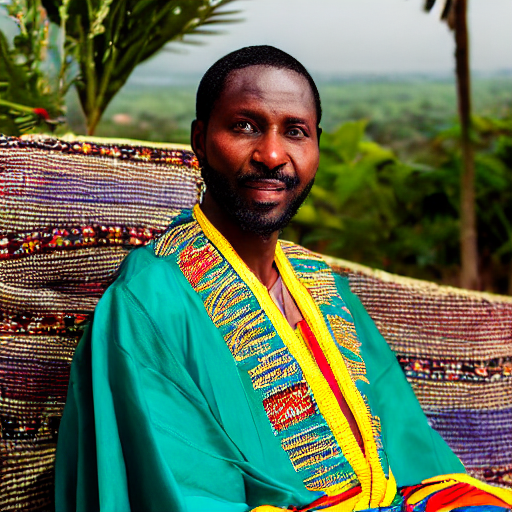


Retrieved from database: Generation #3
Original prompt: Yoruba man in Agbada
Enhanced prompt: A Yoruba man in a richly embroidered Agbada, adorned with intricate patterns and vibrant colors, sits proudly in a serene West African landscape, surrounded by lush greenery and vibrant flowers, with a warm golden light casting long shadows across his dignified face, captured in a high-resolution 8K image with hyper-realistic details.
Image path: output/20250427_151249.png
Database connection closed


In [22]:
if __name__ == "__main__" or '__file__' not in globals():
    # Setup paths
    output_dir = "generated_images"
    log_file = "logs/generation.log"
    db_path = "cultural_images.db"

    # Set up logging and database
    logger = setup_logging(log_file=log_file, level=logging.INFO)
    db = MockDatabase(db_path=db_path)

    # Replace with your Groq API key or set as environment variable
    api_key = "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"  # Replace with actual key
    prompt = "Yoruba man in Agbada"

    try:
        # Generate image with database support
        image, enhanced_prompt, context, generation_id = generate_enhanced_image_with_db(
            prompt,
            groq_api_key=api_key,
            db=db,
            logger=logger,
            height=512,
            width=512
        )

        # Retrieve the saved generation from the database
        retrieved = db.get_generation(generation_id)
        print(f"\nRetrieved from database: Generation #{retrieved['id']}")
        print(f"Original prompt: {retrieved['original_prompt']}")
        print(f"Enhanced prompt: {retrieved['enhanced_prompt']}")
        print(f"Image path: {retrieved['image_path']}")

        # Close database connection when done
        db.close()
    except Exception as e:
        logger.error(f"Error during image generation: {e}")
        if db:
            db.close()


Analyzing prompt...
Analysis complete: portrait with cultural elements

Enhancing prompt using Groq's Llama model...
Enhanced Prompt: A dignified Yoruba man in traditional Agbada attire, adorned with intricate Adire patterns and a majestic woven cap, standing confidently against a warm, golden-lit background of a Yoruba-inspired textile, with every fold and crease of his attire meticulously rendered in high resolution.
Loading CompVis/stable-diffusion-v1-4... (This may take a few minutes)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded in 21.9 seconds

Generating image...


  0%|          | 0/30 [00:00<?, ?it/s]

Image generated in 28.3 seconds

Image saved to: output/20250427_150551.png
Metadata saved to: output/20250427_150551_metadata.json


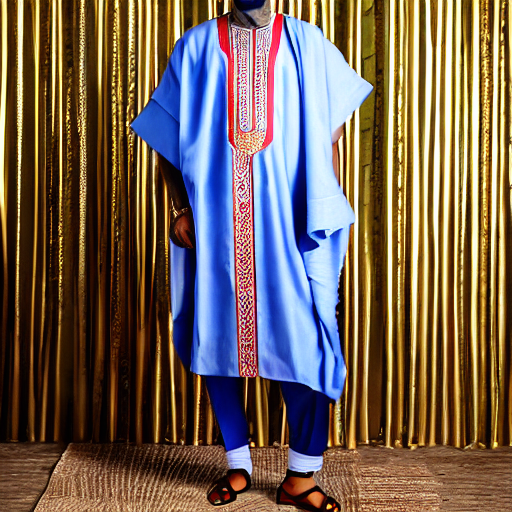

(<PIL.Image.Image image mode=RGB size=512x512>,
 'A dignified Yoruba man in traditional Agbada attire, adorned with intricate Adire patterns and a majestic woven cap, standing confidently against a warm, golden-lit background of a Yoruba-inspired textile, with every fold and crease of his attire meticulously rendered in high resolution.',
 {'cultural_elements': {'ethnic_group': ['yoruba'],
   'region': ['west_africa'],
   'clothing': ['formal'],
   'type': ['agbada']},
  'general_category': 'portrait',
  'colors': [],
  'styles': [],
  'subjects': ['man'],
  'time_of_day': None,
  'prompt_length': 4,
  'is_cultural': True})

In [17]:
# Replace with your Groq API key or set as environment variable
api_key = "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"
prompt = "Yoruba man in Agbada"

# Generate image with direct function call
generate_enhanced_image(prompt, groq_api_key=api_key)

In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00


Gradio User Interface for Interacting with the AI Pipeline

For testing use this GROQ API KEY: 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

In [15]:
class GradioInterface:
    def __init__(self, output_dir="generated_images", log_file="logs/generation.log"):
        """Initialize the Gradio interface with necessary components"""
        # Set up paths
        self.output_dir = output_dir
        os.makedirs(output_dir, exist_ok=True)
        os.makedirs(os.path.dirname(log_file), exist_ok=True)

        # Initialize logger
        self.logger = self.setup_logging(log_file=log_file, level=logging.INFO)

        # Initialize generator components
        self.analyzer = PromptAnalyzer()

        # API Key handling
        self.api_key = os.environ.get("GROQ_API_KEY", "")

        # Initialize demo when needed (lazy loading)
        self.stable_diffusion = None

    def setup_logging(self, log_file, level=logging.INFO):
        """Set up basic logging configuration"""
        logging.basicConfig(
            filename=log_file,
            level=level,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )
        return logging.getLogger(__name__)

    def lazy_load_model(self):
        """Lazy loading of the stable diffusion model"""
        if self.stable_diffusion is None:
            self.logger.info("Loading StableDiffusion model (first use)...")
            self.stable_diffusion = StableDiffusionGenerator()
            self.logger.info("Model loaded successfully")

    def set_api_key(self, api_key):
        """Set the Groq API key"""
        if api_key and api_key.strip():
            self.api_key = api_key.strip()
            os.environ["GROQ_API_KEY"] = self.api_key
            return "API key set successfully!"
        return "Please enter a valid API key"

    def analyze_prompt(self, prompt):
        """Analyze the prompt and return detailed information"""
        if not prompt or not prompt.strip():
            return "Please enter a valid prompt"

        context = self.analyzer.analyze(prompt)

        # Format the results for display
        results = []
        results.append(f"**General Category:** {context['general_category']}")

        if context['is_cultural']:
            results.append("\n**Cultural Elements Detected:**")
            for elem_type, values in context['cultural_elements'].items():
                if values:
                    results.append(f"- {elem_type.title()}: {', '.join(values)}")

        if context['subjects']:
            results.append(f"\n**Subjects:** {', '.join(context['subjects'])}")

        if context['styles']:
            results.append(f"\n**Artistic Styles:** {', '.join(context['styles'])}")

        if context['colors']:
            results.append(f"\n**Colors:** {', '.join(context['colors'])}")

        if context['time_of_day']:
            results.append(f"\n**Time of Day:** {context['time_of_day']}")

        return "\n".join(results)

    def enhance_prompt(self, prompt):
        """Enhance the prompt using Groq's LLM"""
        if not prompt or not prompt.strip():
            return "Please enter a valid prompt"

        if not self.api_key:
            return "Please set your Groq API key first"

        try:
            context = self.analyzer.analyze(prompt)
            enhancer = GroqPromptEnhancer(api_key=self.api_key)
            enhanced = enhancer.enhance(prompt, context)
            return enhanced
        except Exception as e:
            self.logger.error(f"Error enhancing prompt: {str(e)}")
            return f"Error: {str(e)}"

    def generate_image(self, prompt, use_enhancement=True, width=512, height=512):
        """Generate an image from the prompt"""
        if not prompt or not prompt.strip():
            return None, "Please enter a valid prompt", prompt

        if use_enhancement and not self.api_key:
            return None, "Please set your Groq API key for enhancement", prompt

        try:
            # Lazy load the model
            self.lazy_load_model()

            # Analyze the prompt
            context = self.analyzer.analyze(prompt)

            # Enhance the prompt if requested
            if use_enhancement:
                try:
                    enhancer = GroqPromptEnhancer(api_key=self.api_key)
                    enhanced_prompt = enhancer.enhance(prompt, context)
                except Exception as e:
                    self.logger.error(f"Error enhancing prompt: {str(e)}")
                    enhanced_prompt = prompt
                    return None, f"Enhancement error: {str(e)}. Please check your API key.", prompt
            else:
                enhanced_prompt = prompt

            # Generate the image
            start_time = time.time()
            image = self.stable_diffusion.generate_image(
                enhanced_prompt, context, width=width, height=height
            )
            generation_time = time.time() - start_time

            # Save the image
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            image_path = os.path.join(self.output_dir, f"{timestamp}.png")
            image.save(image_path)

            self.logger.info(f"Image generated successfully in {generation_time:.1f} seconds")
            return image, f"Image generated in {generation_time:.1f} seconds", enhanced_prompt

        except Exception as e:
            self.logger.error(f"Error generating image: {str(e)}")
            return None, f"Error: {str(e)}", prompt

    def create_gradio_interface(self):
        """Create and configure the Gradio interface"""
        with gr.Blocks(title="Image Generator") as demo:
            gr.Markdown("# AI Image Generator")
            gr.Markdown("Generate images with optional AI prompt enhancement")

            with gr.Row():
                with gr.Column():
                    # API Key section
                    api_key_input = gr.Textbox(
                        label="Groq API Key",
                        placeholder="Enter your Groq API key here",
                        type="password",
                        value=self.api_key
                    )
                    api_key_button = gr.Button("Set API Key")
                    api_key_status = gr.Textbox(label="API Key Status")

                    # Prompt input
                    prompt_input = gr.Textbox(
                        label="Image Prompt",
                        placeholder="Enter your image prompt here...",
                        lines=3
                    )

                    # Options
                    use_enhancement = gr.Checkbox(
                        label="Use AI Enhancement",
                        value=True,
                        info="Uses Groq's LLM to enhance your prompt"
                    )

                    with gr.Row():
                        width_slider = gr.Slider(
                            minimum=256, maximum=1024, step=64, value=512,
                            label="Width"
                        )
                        height_slider = gr.Slider(
                            minimum=256, maximum=1024, step=64, value=512,
                            label="Height"
                        )

                    # Action buttons
                    with gr.Row():
                        analyze_button = gr.Button("Analyze Prompt")
                        enhance_button = gr.Button("Preview Enhanced Prompt")
                        generate_button = gr.Button("Generate Image", variant="primary")

                with gr.Column():
                    # Outputs
                    output_image = gr.Image(label="Generated Image")
                    output_status = gr.Textbox(label="Status")

                    with gr.Accordion("Prompt Details", open=False):
                        original_prompt = gr.Textbox(
                            label="Original Prompt",
                            lines=2,
                            interactive=False
                        )
                        enhanced_prompt_output = gr.Textbox(
                            label="Enhanced Prompt",
                            lines=3,
                            interactive=False
                        )

            # Connect components
            api_key_button.click(
                fn=self.set_api_key,
                inputs=api_key_input,
                outputs=api_key_status
            )

            analyze_button.click(
                fn=self.analyze_prompt,
                inputs=prompt_input,
                outputs=output_status
            )

            enhance_button.click(
                fn=self.enhance_prompt,
                inputs=prompt_input,
                outputs=enhanced_prompt_output
            )

            generate_button.click(
                fn=self.generate_image,
                inputs=[prompt_input, use_enhancement, width_slider, height_slider],
                outputs=[output_image, output_status, enhanced_prompt_output]
            )

            # Show original prompt when generating
            prompt_input.change(
                fn=lambda x: x,
                inputs=prompt_input,
                outputs=original_prompt
            )

        return demo

    def launch(self, share=False, server_name="0.0.0.0", server_port=7860):
        """Launch the Gradio interface"""
        demo = self.create_gradio_interface()
        demo.launch(
            share=share,
            server_name=server_name,
            server_port=server_port
        )


# Main execution
if __name__ == "__main__":
    # Install gradio if not already installed
    try:
        import gradio as gr
    except ImportError:
        import os
        os.system("pip install gradio")
        import gradio as gr

    # Create and launch the interface
    interface = GradioInterface()

    # Set default API key from environment variable if available
    default_api_key = os.environ.get("GROQ_API_KEY", "")
    if default_api_key:
        interface.set_api_key(default_api_key)

    try:
        # Launch with share=True if you want a public URL
        interface.launch(share=True, server_port=7862)
    except KeyboardInterrupt:
        print("Application closed by user")

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://615599ea793c9446aa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
